# 제조

## 품질 관리를 위한 주요 인자 분석

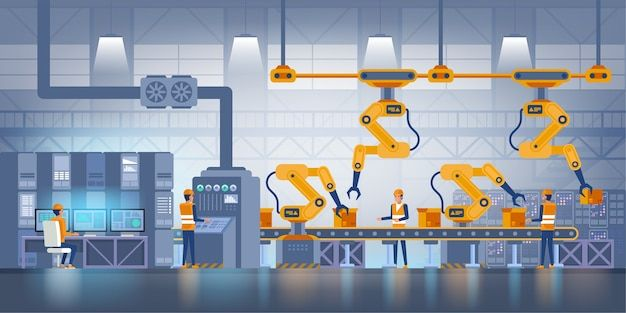

### 📖 목차
- 비즈니스 시나리오
- EDA
- Classification (분류) 예측

### 💼 비즈니스 시나리오

A공장에서는 Wine을 생산한다. 좋은 품질의 Wine은 높은 단가로 시장에 판매할 수 있다. <br>
A공장에서 생산하는 Wine은 1~9등급까지의 등급이 있고, 7등급 이상이 가장 프리미엄 Wine이다. <br>
7등급 이상의 Wine을 최대한 많이 생산해야 영업이익을 남길 수 있다. <br>
Wine 품질에 영향을 끼치는 주요 공정변수를 확인하고, 공정 변수 관리를 통해 7등급 이상의 Wine을 생성하고자 한다. 

#### 🔎 문제 정의

7등급 이상 프리미엄 Wine 생산량 부족

#### ✨ 기대 효과

7등급 이상 프리미엄 Wine 생산량 증가, 영업이익 증가

#### ✔️ 해결 방안

Wine 품질에 영향을 미치는 인자 도출 및 공정 관리를 통한 프리미엄 Wine 생산

#### 🗝️ 성과 측정

공정변수 Control 전/후 프리미엄 Wine 생산량 비교

#### ⚙️ 운영

- Model을 통해 도출된 중요 공정 변수와 품질간의 상관관계 분석
- 해당 공정 변수 관리를 통해 프리미엄 Wine 생산

### 🗂️ DATA
- 생산된 와인의 품질(quality)과 품질 검사시 기록된 공정데이터

In [88]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
import pandas as pd

df1 = pd.read_csv('./S_PJT02_DATA1.csv', sep=';')
df2 = pd.read_csv('./S_PJT02_DATA2.csv', sep=';')

df = pd.concat([df1, df2], axis=0)
df.reset_index(drop=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 📍 EDA - 품질 중요인자 탐색

#### 1. 데이터 전처리

* **데이터 기본 정보 확인**
    - Data Shape(형태) 확인
    - Data Type 확인
    - Null값 확인
    - Outlier 확인

In [90]:
# Data Shape

print('df', df.shape)

df (6497, 12)


In [91]:
# Data Type

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [92]:
# Null값 확인

print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [93]:
# Outlier 확인

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


* **Wine 품질별 빈도수 확인**
    - 3,4,8,9 등급의 Wine이 현저하게 적음

In [94]:
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

- **Wine 등급 재분류**
    - Classification 을 위해 3~9까지 나누어진 등급을 
    - 7등급 이하 (0) / 7등급 이상 (1) 로 분류

In [95]:
import numpy as np

df['target'] = np.where(df['quality']>6, 1, 0)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [96]:
df['target'].value_counts()

target
0    5220
1    1277
Name: count, dtype: int64

* 전체 데이터 중 약 20%가 좋은 품질의 와인에 대한 분포도를 가지고 있다.

In [97]:
1277/(1277+5220)

0.19655225488687086

#### 2. EDA를 통해 품질 중요인자 탐색 

* **상관계수(heatmap)을 통한 중요인자 사전탐색**

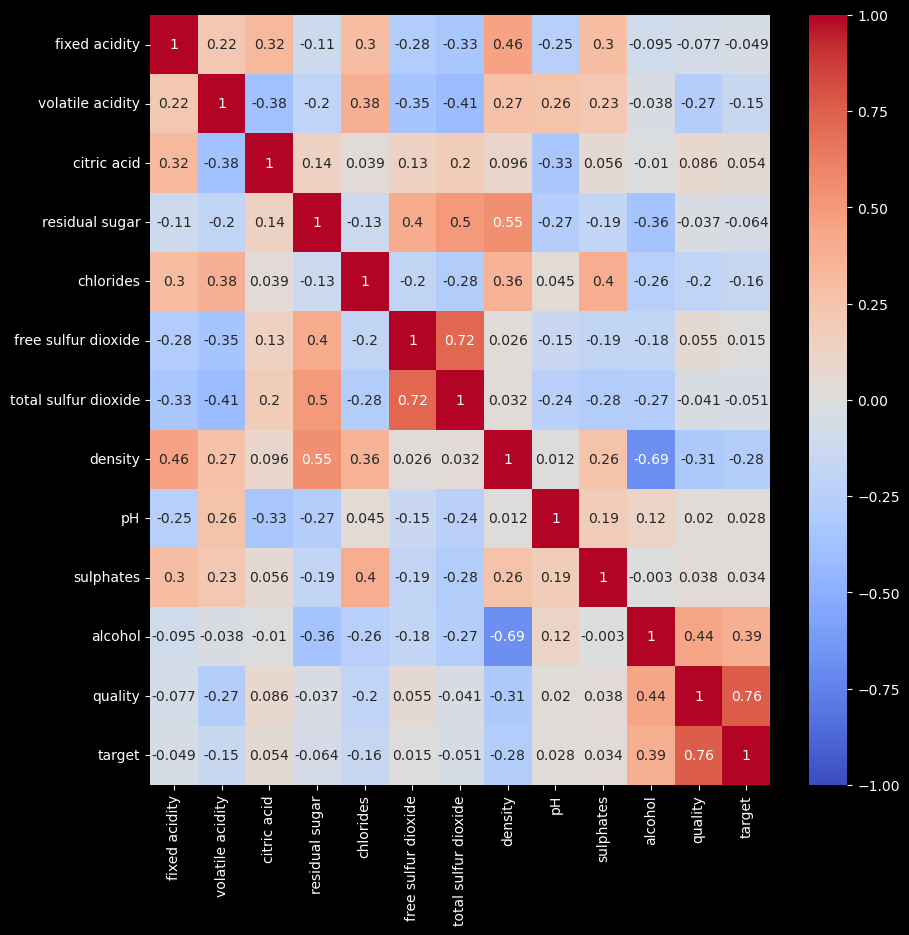

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

# 상관계수 확인
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');
plt.gcf().set_size_inches(10, 10)

- **상관계수(0.2) 이상의 상관관계를 가지는 변수 집중 탐색**
    - volatile acidity(휘발선상) `음의 상관관계`
        - 등급이 올라갈수록 volatile acidity(휘발선상)이 낮아지는 경향성이 보임
    - density(밀도) `음의 상관관계`
        - 높은 등급이 밀도가 낮으며, 낮은 등급일 수록 밀도가 높다
    - alcohol(알코올) `양의 상관관계`
        - 높은 등급일수록 알코올이 높으며, 낮은 등급일 수록 알코올이 낮다

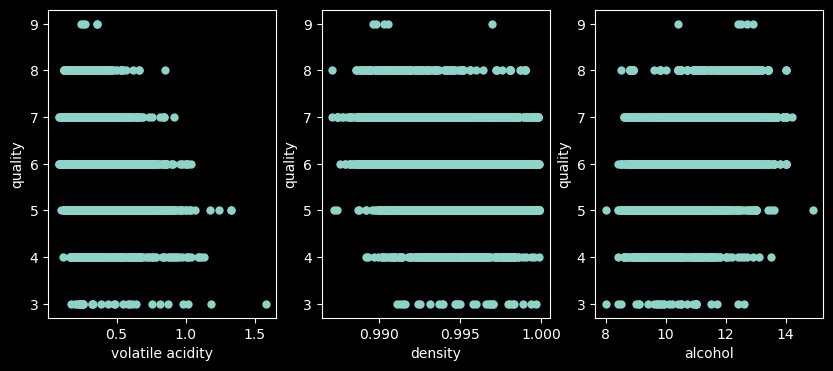

In [99]:
fig, axes = plt.subplots(1, 3)
sns.scatterplot(data = df, x='volatile acidity', y='quality', linewidth=0, ax=axes[0])
sns.scatterplot(x=df[df['density']<1]['density'], y=df[df['density']<1]['quality'], linewidth=0, ax=axes[1])
sns.scatterplot(x=df['alcohol'], y=df['quality'], linewidth=0, ax=axes[2])
plt.gcf().set_size_inches(10, 4)

### 📍 선형회귀 활용 - 품질 중요인자 도출 

#### 🐳 Ver.01

#### 1. 모델링을 위한 데이터 준비
- 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
- 학습과 예측을 위한 Train / Test set 분할

In [100]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df.drop(['quality', 'target'], axis=1)
Y = df['quality']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4547, 11)
(4547,)
(1950, 11)
(1950,)


#### 2. 모델 학습 및 평가
- 모델을 학습하고 예측을 수행하여 성능을 평가
- 선형회귀 실습에서는 사전에 정의한 Target을 사용하지 않고, 기존 Quality를 예측

In [101]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [102]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

# Train/Test Data 모두 예측하고 성능 비교 (과적합 여부 판별)
y_pred_train = mlr.predict(x_train)
y_pred_test = mlr.predict(x_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  0.5744335979434582
r2_score(r2):  0.29046109111798124

mae_test(mae):  0.5560930321321431
r2_score(r2):  0.2928792198572786


In [103]:
# 실제 값과 예측 값에 대해 표현
df_result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test}).reset_index(drop=True)
df_result['diff'] = df_result['Real Values'] - df_result['Predicted Values']
df_result.head(5)

,Real Values,Predicted Values,diff
0,5,5.668842,-0.668842
1,5,5.530597,-0.530597
2,6,5.650963,0.349037
3,6,5.689054,0.310946
4,7,5.387630,1.612370


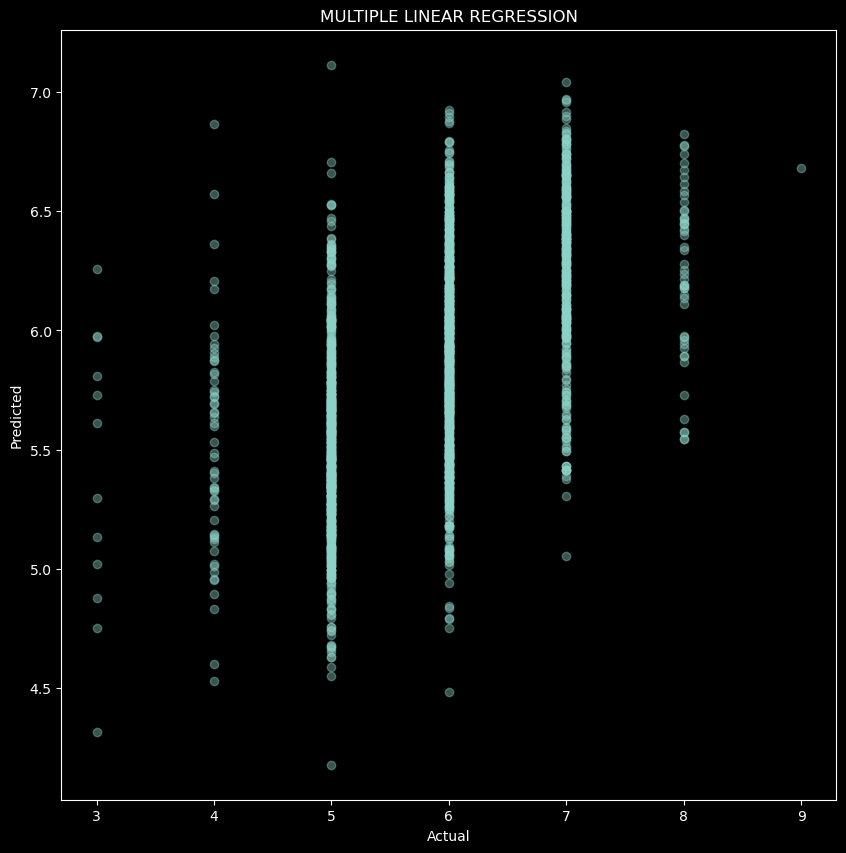

In [104]:
# 예측 모델이 얼마나 실제 문제를 잘 설명하는 가를 그래프로 표현
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.gcf().set_size_inches(10, 10)
plt.show()

In [105]:
# 실제 값과 예측 값에 대해 표현 (반올림해서 정수값으로 변환)
df_result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':list(round(df_result['Predicted Values'], 0))})
df_result['diff'] = df_result['Real Values'] - df_result['Predicted Values']
df_result.head(5)

,Real Values,Predicted Values,diff
531,5,6.0,-1.0
2769,5,6.0,-1.0
264,6,6.0,0.0
2516,6,6.0,0.0
364,7,5.0,2.0


In [106]:
# 0.5정도 예측에서 벗어난다
abs(df_result['diff']).mean()

0.5102564102564102

In [107]:
y_pred_test

array([5.66884223, 5.53059664, 5.65096349, ..., 5.92730632, 6.07530514,
       4.94401978])

In [108]:
np.round(y_pred_test, 0).astype(int)

array([6, 6, 6, ..., 6, 6, 5])

In [109]:
# 변형된 y 값에 대한 mae
pred_test = np.round(y_pred_test, 0).astype(int)
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, np.round(y_pred_test, 0))
print('r2_score(r2): ', r2_test)

mae_test(mae):  0.5560930321321431
r2_score(r2):  0.15495098761792436


#### 3. 다중 회귀 상관계수 확인
- 회귀식의 장점 : 계수(Coefficient)로 어느 정도 설명 가능하다.

In [110]:
df_coef = pd.DataFrame({'col':X.columns, 'coef':mlr.coef_}).reset_index(drop=True)
df_coef

,col,coef
0,fixed acidity,0.070126
1,volatile acidity,-1.309056
2,citric acid,-0.029567
3,residual sugar,0.045292
4,chlorides,-0.448707
5,free sulfur dioxide,0.006459
6,total sulfur dioxide,-0.002560
7,density,-57.386048
8,pH,0.490313
9,sulphates,0.672228


#### 🐳 Ver.02

#### 1. 다중공선성 제거
- 위 분석 결과의 회귀 계수가 불안정
- 회귀 계수가 해당 변수의 종속변수에 미치는 영향력을 올바로 설명하지 못함
- 어떤 변수에 의해서 결과가 나왔는지 해석하기 어렵기 때문에 다중공선성 제거 진행

In [111]:
df_corr = df.corr()
df_corr = df_corr[(abs(df_corr) > 0.5) & (df_corr != 1)]
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
fixed acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.552517,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,0.720934,NaN,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,0.720934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
density,NaN,NaN,NaN,0.552517,NaN,NaN,NaN,NaN,NaN,NaN,-0.686745,NaN,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2. 모델링을 위한 데이터 준비
- 다중공선성이 의심되는 변수 제거 (서로 중복된 정보를 제공하는 변수들 중 택1)
    - (density, residual sugar) → 0.552517
    - (total sulfur dioxide, free sulfur dioxide) → 0.720934
    - (pH, alcohol) → 0.720934

In [112]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df.drop(['quality', 'target', 'residual sugar', 'total sulfur dioxide', 'pH'], axis=1)
Y = df['quality']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4547, 8)
(4547,)
(1950, 8)
(1950,)


#### 3. 모델 학습 및 평가

In [113]:
# 모델 학습
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [114]:
# 예측 및 평가
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

y_pred_train = mlr.predict(x_train)
y_pred_test = mlr.predict(x_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  0.5714851665606988
r2_score(r2):  0.26985879688208503

mae_test(mae):  0.5877121505909481
r2_score(r2):  0.2962601284966311


* Ver.01와 비교
    - Density(밀도)의 회귀계수의 부호가 바뀜

In [115]:
# Ver.02 coef
df_coef_2 = pd.DataFrame({'col':X.columns, 'coef':mlr.coef_}).reset_index(drop=True)
df_coef_2

,col,coef
0,fixed acidity,-0.004498
1,volatile acidity,-1.534692
2,citric acid,-0.233564
3,chlorides,-0.274881
4,free sulfur dioxide,0.002825
5,density,29.855049
6,sulphates,0.546190
7,alcohol,0.363925


In [116]:
# Ver.01 coef
df_coef

,col,coef
0,fixed acidity,0.070126
1,volatile acidity,-1.309056
2,citric acid,-0.029567
3,residual sugar,0.045292
4,chlorides,-0.448707
5,free sulfur dioxide,0.006459
6,total sulfur dioxide,-0.002560
7,density,-57.386048
8,pH,0.490313
9,sulphates,0.672228


#### 🐳 Ver.03

#### 1. minmax_scale 표준화

In [117]:
# Ver.02 Data copy()
df_sc = df.copy()

In [118]:
from sklearn.preprocessing import minmax_scale

# 'target' 컬럼 제외한 모든 컬럼 스케일링
for i in list(df.columns[0:11]):
    df_sc[i] = minmax_scale(df_sc[i], axis=0, copy=True)

df_sc.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,5,0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,5,0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,6,0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,0


#### 2. 모델링을 위한 데이터 준비
- 동일하게 다중공선성 제거 적용 (서로 중복된 정보를 제공하는 변수들 중 택1)
    - (density, residual sugar) → 0.552517
    - (total sulfur dioxide, free sulfur dioxide) → 0.720934
    - (pH, alcohol) → 0.720934

In [119]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df_sc.drop(['quality', 'target', 'residual sugar', 'total sulfur dioxide', 'pH'], axis=1)
Y = df_sc['quality']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4547, 8)
(4547,)
(1950, 8)
(1950,)


#### 3. 모델 학습 및 평가

In [120]:
# 모델 학습
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [121]:
# 예측 및 평가
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

y_pred_train = mlr.predict(x_train)
y_pred_test = mlr.predict(x_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  0.5664877566925587
r2_score(r2):  0.2889749343034752

mae_test(mae):  0.5968427632614035
r2_score(r2):  0.253965162575419


* Ver.02와 비교
    - Scaling을 통해 해석하기 쉬워짐

In [122]:
# Ver.03

df_coef_3 = pd.DataFrame({'col':X.columns, 'coef':mlr.coef_}).reset_index(drop=True)
df_coef_3

,col,coef
0,fixed acidity,-0.068486
1,volatile acidity,-2.197694
2,citric acid,-0.311807
3,chlorides,-0.455332
4,free sulfur dioxide,1.165167
5,density,1.674416
6,sulphates,1.193808
7,alcohol,2.607258


In [123]:
# Ver.02

df_coef_2

,col,coef
0,fixed acidity,-0.004498
1,volatile acidity,-1.534692
2,citric acid,-0.233564
3,chlorides,-0.274881
4,free sulfur dioxide,0.002825
5,density,29.855049
6,sulphates,0.546190
7,alcohol,0.363925


* 결과
    - 와인의 품질을 높이는 인자 : alcohol, density, free sulfur dioxide, sulphates
    - 와인의 품질을 낮추는 인자 : volatile acidity, fixed acidity, citric acid, chlorides

### 📍 ML(LightGBM) 활용 - 품질 중요인자 도출 

#### 1. 모델링을 위한 데이터 준비
- 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
- 학습과 예측을 위한 Train / Test set 분할

In [124]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split

# 데이터 세트 로드
X = df.drop(['quality', 'target'], axis=1)
Y = df['target']

# train/test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# 데이터 세트를 LGB형태로 변환
d_train = lgb.Dataset(x_train, label=y_train)

#### 2. 모델 학습 및 평가
- 모델을 학습하고 예측을 수행하여 성능을 평가

In [125]:
# 하이퍼파라미터 설정
params = {}
params['learning_rate'] = 0.02
params['boosting_type'] = 'gbdt' # GradientBoostingDecisionTree
params['objective'] = 'binary'
params['metric'] = 'binary_logloss' # metric for binary_class
params['max_depth'] = 3
params['num_leaves'] = 6
params['seed'] = 23456

# 모델 학습
clf = lgb.train(params, d_train, 1000) # epocs 수

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 866, number of negative: 3681
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1490
[LightGBM] [Info] Number of data points in the train set: 4547, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.190455 -> initscore=-1.447055
[LightGBM] [Info] Start training from score -1.447055
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [126]:
y_pred_train = clf.predict(x_train)
y_pred_train

array([0.00387741, 0.02178261, 0.0138947 , ..., 0.51066467, 0.23960839,
       0.01301569])

In [127]:
from sklearn.metrics import classification_report

y_pred_train = clf.predict(x_train)
for i in range(0,len(y_pred_train)):
    if y_pred_train[i]>=.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:
       y_pred_train[i]=0

y_pred_test = clf.predict(x_test)
for i in range(0,len(y_pred_test)):
    if y_pred_test[i]>=.5:       # setting threshold to .5
       y_pred_test[i]=1
    else:
       y_pred_test[i]=0

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3681
           1       0.80      0.52      0.63       866

    accuracy                           0.88      4547
   macro avg       0.85      0.74      0.78      4547
weighted avg       0.88      0.88      0.87      4547

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1539
           1       0.70      0.39      0.50       411

    accuracy                           0.84      1950
   macro avg       0.78      0.67      0.70      1950
weighted avg       0.82      0.84      0.82      1950



#### 3. 중요 변수 파악
- Feature IMP 분석을 통한 중요변수 파악

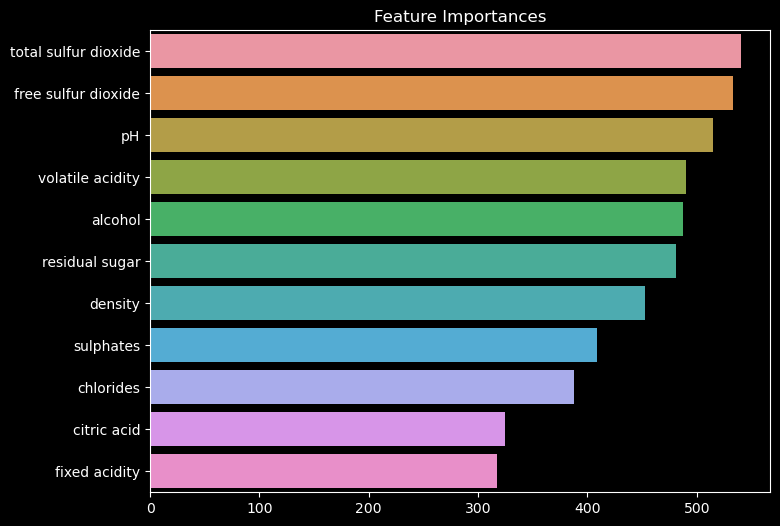

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = clf.feature_importance()
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:21]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

#### 4. 모델 Save and Read
- 최종 모델을 저장 및 다시 불러오기

In [129]:
import pickle

# 모델 저장
saved_model = pickle.dumps(clf)

# 모델 Read
clf_from_pickle = pickle.loads(saved_model)